In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statistics
import math
import statistics as stat
import os
import pandas as pd
import numpy as np
import json
from Bio.PDB import *
from Bio import AlignIO 
from Bio import SeqUtils
import seaborn as sns
from pymol import cmd

pd.set_option("display.max_rows", None)

Analyis of bad example - normal procedure

In [50]:


#getting number of ligands
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock')
num_lig = os.listdir('./')
names_lig=[]
#collecting the data
result = np.empty(2)
result =np.empty(2)
for f,folder in enumerate(num_lig):
    if 'INP' in folder:
        continue
    os.chdir(folder)
    ha = folder.split('.')[0].strip()
    names_lig.append(float(ha))
    output_file = open('Afffinit_Values.txt').readlines()
    for j, line in enumerate(output_file):
        RMSD_list =[]
        if '   1 ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                hold = folder.split('.')[0].strip()
                spacehold =np.hstack([spacehold,hold])		
                if spacehold.size == 2:
                    result = np.vstack([result,spacehold])
        
    os.chdir('..')                     
result = np.delete(result,0,0)

table = pd.DataFrame(result, columns=['values','snap'],dtype=float)
#table =table.set_index('lig')
#table =table.sort_index()

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ): display(table)
### table of affinity values of ligands for every snapshot

values   snap
0   -6.522  132.0
1   -6.438   30.0
2   -6.027   27.0
3   -5.942   12.0
4   -6.161  147.0
5   -7.224  192.0
6   -5.280   21.0
7   -5.606  270.0
8   -6.101  264.0
9   -6.044   57.0
10  -5.875   90.0
11  -5.975   63.0
12  -6.016   42.0
13  -8.486  189.0
14  -6.735  243.0
15  -5.913   39.0
16  -5.948  225.0
17  -6.466  249.0
18  -7.348  273.0
19  -6.039   66.0
20  -6.263   36.0
21  -6.568  150.0
22  -6.013  255.0
23  -6.245  138.0
24  -6.205  267.0
25  -6.690  246.0
26  -6.200   81.0
27  -6.922  237.0
28  -7.400  141.0
29  -5.983  261.0
30  -6.173   45.0
31  -6.478   54.0
32  -6.998  240.0
33  -6.357  213.0
34  -4.945   69.0
35  -7.029  276.0
36  -7.893  201.0
37  -5.996  159.0
38  -7.844  195.0
39  -6.214  135.0
40  -6.217   60.0
41  -5.983    9.0
42  -6.055  120.0
43  -7.953  183.0
44  -7.592  177.0
45  -6.725   18.0
46  -6.101  126.0
47  -6.497   33.0
48  -5.844  144.0
49  -5.907  114.0
50  -6.011  168.0
51  -5.840  219.0
52  -8.105  234.0
53  -6.351  129.0
54  -4.844   84.0
55  -6.327  228.0
56  -6.179    6.0
57  -7.811  174.0
58  -6.214  156.0
59  -8.516  186.0
60  -6.225   48.0
61  -6.400   99.0
62  -5.676   93.0
63  -5.783  117.0
64  -5.695   96.0
65  -6.095   75.0
66  -6.639  252.0
67  -6.309   15.0
68  -7.405  204.0
69  -7.603  210.0
70  -6.043  111.0
71  -8.129  171.0
72  -5.844    3.0
73  -5.797  108.0
74  -5.535   87.0
75  -5.899  105.0
76  -6.322   72.0
77  -6.218  165.0
78  -7.939  207.0
79  -5.750  222.0
80  -7.058  216.0
81  -6.356  162.0
82  -6.250   51.0
83  -7.357  258.0
84  -6.247  153.0
85  -6.213   24.0
86  -5.766  102.0
87  -7.504  198.0
88  -8.166  180.0
89  -6.000  231.0
90  -5.767  123.0
91  -6.054   78.0

In [ ]:
names = ['hold','LR','hold','CNN','vol','expo','pos-charg','neg-charg','h-donor','h-acceptor','hydrophobic','aromatic','metal']
pocket_data = table.set_index('snap')
content_values =pd.DataFrame(columns=['snap'])

for k in range(0,12,1):
    data =pd.read_table('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/pocket_size_summ.dat', header=1, sep='\s+').fillna(0).values
    count = 0
    erg=np.empty(2)
    if k+2 == 3:
         continue
    for i in range(len(data)): 
        if data[i][2] > 0:
            count =count+1        
    if data[2][0] == '#': 
        for i in range(0,count*2,2):
            spacehold = np.empty(0)
            a =float(data[i+1][k+2])
            spacehold =np.hstack([spacehold, a])
            a =data[i][1]
            spacehold =np.hstack([spacehold, a])
            if spacehold.size == 2:
                erg = np.vstack([erg,spacehold])
            
    else:
        count=0
        for i in range(len(data)): 
                count =count+1
        for i in range(1,count):
            spacehold = np.empty(0)
            a =float(data[i][k+2])
            spacehold =np.hstack([spacehold, a])
            a =data[i][0]
            spacehold =np.hstack([spacehold, float(a)])
            if spacehold.size == 2:
                erg = np.vstack([erg,spacehold])
    erg = np.delete(erg,0,0)
    table_hold = pd.DataFrame(erg, columns=[names[k+1],'snap',])
    #content_values = pd.concat([content_values,table_hold])
    content_values = content_values.merge(table_hold,how='right',on='snap')   
   

content_values =content_values.set_index('snap')
content_values =content_values.sort_index()

""" with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ): display(pocket_data.join(content_values)) """

all_combined = pocket_data.join(content_values)
display(all_combined)

In [ ]:
fig, ax = plt.subplots(1,2,sharey=True)
n=0
drug=['LR','CNN']


whole_list=[]
#values
numb = list(all_combined['values'])
numb =[float(i) for i in numb]
#drug
for i in range(2):
    bmun=all_combined[drug[i]].tolist()
    bmun =[float(i) for i in numb]
    whole_list.append(bmun)



for n in range(2):
    ax[n].scatter(x=numb,y=all_combined[drug[n]].tolist())
    ax[n].set_xlabel('affinity value')
    
ax[0].set_title('LR')
ax[1].set_title('CNN')
#fig.suptitle('betalactamase - affinity values plotted against druggability score')
ax[0].set_ylabel('druggability score')
#x= afff values
#y = drugg score


In [ ]:
fig, ax = plt.subplots(1,2,sharey=True)
n=0
drug=['LR','CNN']


whole_list=[]
#values
numb = list(all_combined['values'])
numb =[float(i) for i in numb]
#drug
for i in range(2):
    bmun=all_combined[drug[i]].tolist()
    bmun =[float(i) for i in numb]
    whole_list.append(bmun)



for n in range(2):
    ax[n].scatter(x=numb,y=all_combined[drug[n]].tolist())
    ax[n].set_xlabel('affinity value')
    
ax[0].set_title('LR')
ax[1].set_title('CNN')
#fig.suptitle('betalactamase - affinity values plotted against druggability score')
ax[0].set_ylabel('druggability score')
#x= afff values
#y = drugg score

New analysis part of this bad example; in more detail analysis of the findings by looking at the pymol session

- plott affinity values against drug with notation of snapshot names, basically checking if high affinity values mean that the correct pose was found
- plot distribution of median of rmsd poses with labels of snapshots, could be an indication of finding the correct pose 
- analysis of center of mass to reference point 

In [ ]:
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock')
num_lig = os.listdir('./')
names_lig=[]
#collecting the data
result = np.empty(2)
RMSD = np.empty(2)
for f,folder in enumerate(num_lig):
    if 'INP' in folder:
        continue
    os.chdir(folder)
    ha = folder.split('.')[0].strip()
    names_lig.append(float(ha))
    output_file = open('Afffinit_Values.txt').readlines()
    RMSD_list=[]
    for j, line in enumerate(output_file):
        
        #CHANGE HERE FOR SMINA OR AUTODOCK VINA DEFAULT
        if '   1       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                hold = folder.split('.')[0].strip()
                spacehold =np.hstack([spacehold,hold])		
                if spacehold.size == 2:
                    result = np.vstack([result,spacehold]) 
        if '   2       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
              
        if '   3       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
        if '   4       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
        if '   5       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
        if '   6       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
        if '   7       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
        if '   8       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
        if '   9       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip() 
                a =float(a)
                RMSD_list.append(a)
    spacehold= np.empty(0) 

    RMSD_median = statistics.median(RMSD_list)
    spacehold =np.hstack([spacehold, RMSD_median])
    hold = folder.split('.')[0].strip()
    hold =float(hold)
    spacehold =np.hstack([spacehold,hold])	
    if spacehold.size == 2:
        RMSD = np.vstack([RMSD,spacehold])                                 
    os.chdir('..')
RMSD = np.delete(RMSD,0,0)
                     
result = np.delete(result,0,0)
table = pd.DataFrame(result, columns=['values','snap'],dtype=float)
RMSD_table = pd.DataFrame(RMSD, columns=['RMSD','snap'])

#table =table.set_index('lig')
#table =table.sort_index()




#### -------------------------------- ####


names = ['hold','LR','hold','CNN','vol','expo','pos-charg','neg-charg','h-donor','h-acceptor','hydrophobic','aromatic','metal']
pocket_data = table.set_index('snap')
content_values =pd.DataFrame(columns=['snap'])

for k in range(0,12,1):
    data =pd.read_table('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/pocket_size_summ.dat', header=1, sep='\s+').fillna(0).values
    count = 0
    erg=np.empty(2)
    if k+2 == 3:
         continue
    for i in range(len(data)): 
        if data[i][2] > 0:
            count =count+1        
    if data[2][0] == '#': 
        for i in range(0,count*2,2):
            spacehold = np.empty(0)
            a =float(data[i+1][k+2])
            spacehold =np.hstack([spacehold, a])
            a =data[i][1]
            spacehold =np.hstack([spacehold, a])
            if spacehold.size == 2:
                erg = np.vstack([erg,spacehold])
            
    else:
        count=0
        for i in range(len(data)): 
                count =count+1
        for i in range(1,count):
            spacehold = np.empty(0)
            a =float(data[i][k+2])
            spacehold =np.hstack([spacehold, a])
            a =data[i][0]
            spacehold =np.hstack([spacehold, float(a)])
            if spacehold.size == 2:
                erg = np.vstack([erg,spacehold])
    erg = np.delete(erg,0,0)
    table_hold = pd.DataFrame(erg, columns=[names[k+1],'snap',])
    #content_values = pd.concat([content_values,table_hold])
    content_values = content_values.merge(table_hold,how='right',on='snap')   
   

content_values =content_values.set_index('snap')
content_values =content_values.sort_index()

""" with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ): display(pocket_data.join(content_values)) """

all_combined = pocket_data.join(content_values)
RMSD_table =RMSD_table.set_index('snap')
display(RMSD_table)
all_combined = all_combined.join(RMSD_table)
display(all_combined)



#### -------------------------------- ####


fig, ax = plt.subplots(1,2,sharey=True)
n=0
drug=['LR','CNN']


whole_list=[]
#values
numb = list(all_combined['values'])
numb =[float(i) for i in numb]
#drug
for i in range(2):
    bmun=all_combined[drug[i]].tolist()
    bmun =[float(i) for i in numb]
    whole_list.append(bmun)


for n in range(2):
    ax[n].scatter(x=numb,y=all_combined[drug[n]].tolist())
    ax[n].set_xlabel('affinity value')
    
ax[0].set_title('LR')
ax[1].set_title('CNN')
#fig.suptitle('betalactamase - affinity values plotted against druggability score')
ax[0].set_ylabel('druggability score')
#x= afff values
#y = drugg score


In [ ]:
all_combined =all_combined.reset_index()
fig, ax = plt.subplots(1,2,sharey=True,figsize =(15,16))
n=0
drug=['LR','CNN']


whole_list=[]
#values
numb = list(all_combined['values'])
numb =[float(i) for i in numb]
#drug
for i in range(2):
    bmun=all_combined[drug[i]].tolist()
    bmun =[float(i) for i in numb]
    whole_list.append(bmun)
all_combined


for n in range(2):
    ax[n].scatter(x=numb,y=all_combined['snap'].tolist())
    ax[n].set_xlabel('affinity value')
    ax[n].set_yticks(all_combined['snap'].tolist())
    
ax[0].set_title('LR')
ax[1].set_title('CNN')
#fig.suptitle('betalactamase - affinity values plotted against druggability score')
ax[0].set_ylabel('druggability score')
#x= afff values
#y = drugg score

looked up the poses of snapshot 189, 186, 297,291 and 234 and all of them show that they found the pose in the inside, druggability score also matches it,
maybe a cutoff based on the affinity value could be introduced like mentioned in the internship with like 25% of the best

In [ ]:
#all_combined =all_combined.reset_index()
fig = plt.figure(figsize =(40,40))
ax = fig.add_subplot(projection='3d')
n=0
drug=['LR','CNN']


whole_list=[]
#values
numb = list(all_combined['values'])
numb =[float(i) for i in numb]
#drug
for i in range(2):
    bmun=all_combined[drug[i]].tolist()
    bmun =[float(i) for i in numb]
    whole_list.append(bmun)


ax.scatter(numb,all_combined['RMSD'].tolist(), all_combined['snap'].tolist() )
ax.set_xlabel('affinity value')
ax.set_yticks(all_combined['RMSD'].tolist())

#ax[1].scatter(x=all_combined['snap'].tolist(),y=all_combined['RMSD'].tolist())
#ax[1].set_xlabel('snap')
#ax[1].set_yticks(all_combined['RMSD'].tolist())
#ax[1].set_xticks(all_combined['snap'].tolist())
    
ax.set_title('aff Value')
#ax[1].set_title('snapp')
#fig.suptitle('betalactamase - affinity values plotted against druggability score')
ax.set_ylabel('RMSD')
plt.ylim(1.5,5)

yeah... 
sadly also low aff values can have a low RMSD which makes this possibility useless

Checking the median and distribution of the aff values for the different poses

/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


values
snap            
39.0    0.066921
261.0   0.082757
87.0    0.087859
93.0    0.089049
21.0    0.092118
273.0   0.098241
123.0   0.100550
225.0   0.102730
255.0   0.104606
99.0    0.111336
108.0   0.113110
111.0   0.113894
177.0   0.120093
9.0     0.128180
90.0    0.134575
96.0    0.136294
156.0   0.138871
3.0     0.140260
36.0    0.142845
51.0    0.145115
66.0    0.147124
57.0    0.147782
60.0    0.156128
264.0   0.157877
231.0   0.159329
117.0   0.159433
15.0    0.160453
63.0    0.160472
114.0   0.160570
249.0   0.160690
222.0   0.160982
78.0    0.161288
144.0   0.162476
105.0   0.162678
219.0   0.162957
270.0   0.163279
153.0   0.166140
165.0   0.166704
138.0   0.167773
33.0    0.168207
81.0    0.168438
237.0   0.169553
252.0   0.170482
141.0   0.170730
228.0   0.172493
120.0   0.172852
240.0   0.174287
198.0   0.179545
204.0   0.182566
213.0   0.184604
72.0    0.186780
30.0    0.186973
75.0    0.187334
171.0   0.190154
174.0   0.191386
267.0   0.191692
126.0   0.192876
135.0   0.193555
42.0    0.193843
192.0   0.195623
162.0   0.198437
180.0   0.202016
6.0     0.204031
150.0   0.207148
12.0    0.208318
48.0    0.211968
84.0    0.220362
45.0    0.221102
183.0   0.221749
159.0   0.224935
54.0    0.230941
24.0    0.235114
147.0   0.235850
129.0   0.240592
258.0   0.242997
69.0    0.243747
195.0   0.264186
132.0   0.267069
18.0    0.285018
201.0   0.299915
189.0   0.329565
210.0   0.352440
276.0   0.357402
243.0   0.382176
216.0   0.395536
207.0   0.428783
186.0   0.458236
234.0   0.829404
27.0    2.002336
168.0   2.702279
102.0  13.884038
246.0  68.347689

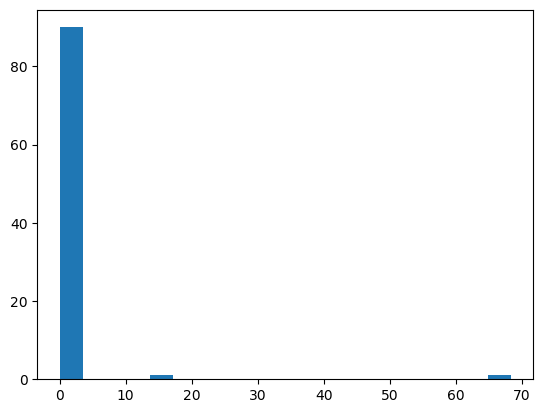

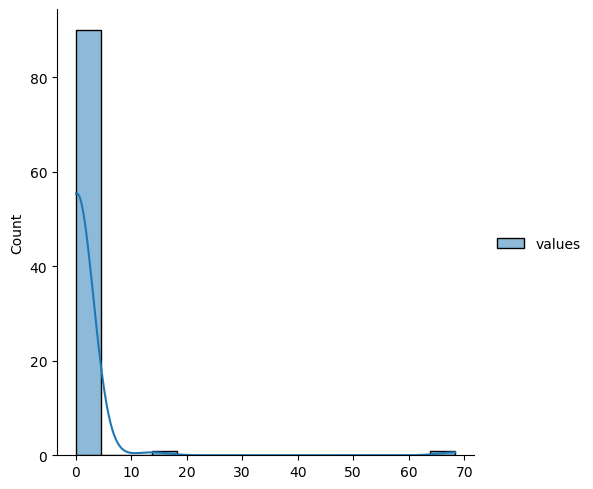

In [7]:


#getting number of ligands
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock')
num_lig = os.listdir('./')
names_lig=[]
#collecting the data
result = np.empty(2)
deviation =np.empty(1)
for f,folder in enumerate(num_lig):
    if 'INP' in folder:
        continue
    os.chdir(folder)
    ha = folder.split('.')[0].strip()
    names_lig.append(float(ha))
    output_file = open('Afffinit_Values.txt').readlines()

    for j, line in enumerate(output_file):
        if '   1       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   2       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   3       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   4       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   5       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   6       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   7       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   8       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   9       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
    
    spacehold= np.empty(0)  
    deviation = np.delete(deviation,0,0)
    #print(deviation)    
    hold = np.std(deviation)
    spacehold =np.hstack([spacehold,hold])
    hold = folder.split('.')[0].strip()
    spacehold =np.hstack([spacehold,hold]) 
    result = np.vstack([result,spacehold])
    deviation =np.empty(1)
    #print(result)   

        
    os.chdir('..')                     
result = np.delete(result,0,0)

table = pd.DataFrame(result, columns=['values','snap'],dtype=float)
#table =table.set_index('lig')
#table =table.sort_index()
pd.set_option("display.max_rows", None)

table =table.set_index('snap')
table=table.sort_index()
plt.hist(table,bins=20)

import seaborn as sns
sns.displot(table, kde=True, bins=15)
table.sort_values('values')

### Everything to the standard deviation of affinity values

Checking the median and distribution of the RMSD for the different poses

/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


values
snap            
192.0   1.634500
183.0   1.669263
96.0    1.670138
177.0   1.680875
249.0   1.686313
186.0   1.688638
189.0   1.697875
225.0   1.766750
258.0   1.917750
120.0   1.977300
171.0   2.004750
33.0    2.006000
264.0   2.011000
84.0    2.081000
60.0    2.082750
69.0    2.093825
111.0   2.112750
231.0   2.166125
252.0   2.180075
51.0    2.195500
63.0    2.224625
267.0   2.230125
237.0   2.238500
195.0   2.288875
228.0   2.303625
240.0   2.311875
72.0    2.330375
213.0   2.348000
198.0   2.351750
180.0   2.352000
102.0   2.404750
174.0   2.411875
99.0    2.425125
57.0    2.432500
210.0   2.487875
54.0    2.489362
108.0   2.574750
18.0    2.590875
207.0   2.760250
153.0   2.790125
162.0   2.838750
204.0   2.921125
201.0   2.932625
66.0    2.946750
48.0    2.981000
24.0    2.986286
261.0   2.992125
129.0   3.030925
36.0    3.042125
105.0   3.080250
270.0   3.108500
273.0   3.147750
165.0   3.182500
75.0    3.208875
93.0    3.223875
141.0   3.232900
39.0    3.286500
87.0    3.326250
114.0   3.377125
12.0    3.425237
45.0    3.432000
255.0   3.515125
222.0   3.660750
150.0   3.818750
30.0    3.840250
159.0   3.877875
219.0   3.980375
243.0   4.006875
123.0   4.126500
135.0   4.170000
144.0   4.332375
126.0   4.382750
138.0   4.430700
27.0    4.611250
81.0    4.623875
6.0     4.710625
9.0     4.717375
3.0     4.890125
234.0   4.954750
117.0   5.356625
90.0    5.362671
42.0    5.468625
21.0    5.754875
15.0    5.783750
132.0   5.891250
246.0   5.902875
156.0   5.991000
276.0   7.465125
216.0   8.028500
78.0    8.578875
147.0   9.331875
168.0  10.311500

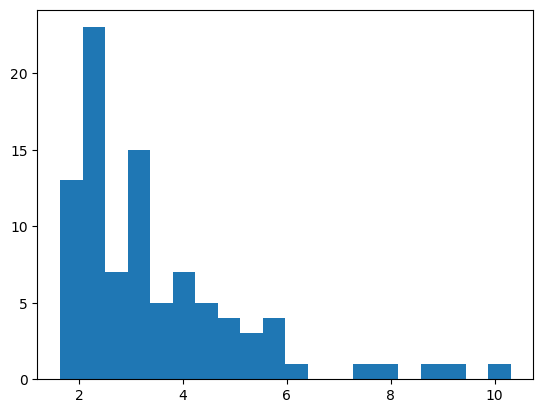

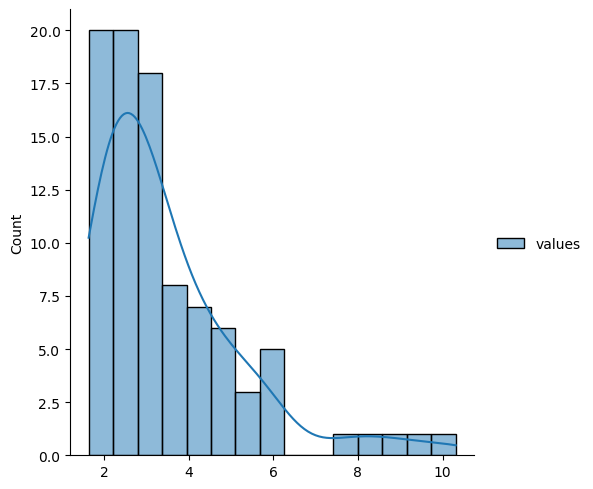

In [53]:
#getting number of ligands
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock')
num_lig = os.listdir('./')
names_lig=[]
#collecting the data
result = np.empty(2)
deviation =np.empty(1)
for f,folder in enumerate(num_lig):
    if 'INP' in folder:
        continue
    os.chdir(folder)
    ha = folder.split('.')[0].strip()
    names_lig.append(float(ha))
    output_file = open('Afffinit_Values.txt').readlines()

    for j, line in enumerate(output_file):
        """    if '   1       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold]) """
        if '   2       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   3       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   4       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   5       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   6       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   7       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   8       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
        if '   9       ' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[2].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                deviation = np.vstack([deviation,spacehold])
    
    spacehold= np.empty(0)  
    deviation = np.delete(deviation,0,0)
    #print(deviation)    
    hold = np.mean(deviation)
    spacehold =np.hstack([spacehold,hold])
    hold = folder.split('.')[0].strip()
    spacehold =np.hstack([spacehold,hold]) 
    result = np.vstack([result,spacehold])
    deviation =np.empty(1)
    #print(result)   

        
    os.chdir('..')                     
result = np.delete(result,0,0)

table = pd.DataFrame(result, columns=['values','snap'],dtype=float)
#table =table.set_index('lig')
#table =table.sort_index()
pd.set_option("display.max_rows", None)

table =table.set_index('snap')
table=table.sort_index()
plt.hist(table,bins=20)


sns.displot(table, kde=True, bins=15)
table.sort_values('values')

### Everything to the standard deviation of affinity values

In [3]:
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock')
num_lig = os.listdir('./')
names_lig=[]
#collecting the data
result = np.empty(2)
for f,folder in enumerate(num_lig):
    if 'INP' in folder:
        continue
    os.chdir(folder)
    ha = folder.split('.')[0].strip()
    names_lig.append(float(ha))
    output_file = open('Afffinit_Values.txt').readlines()
    for j, line in enumerate(output_file):
        #CHANGE HERE FOR SMINA OR AUTODOCK VINA DEFAULT
        if '1       -' in line:
                spacehold= np.empty(0)  
                a =line
                a = "/".join(a.split()) 
                a=a.split("/")[1].strip()
                a = float(a)
                spacehold =np.hstack([spacehold, a])
                hold = folder.split('.')[0].strip()
                spacehold =np.hstack([spacehold,hold])		
                if spacehold.size == 2:
                    result = np.vstack([result,spacehold])         
    os.chdir('..')                     
result = np.delete(result,0,0)
table = pd.DataFrame(result, columns=['values','snap'],dtype=float)
#table =table.set_index('lig')
#table =table.sort_index()

display(table.sort_values('snap'))

values   snap
66  -5.844    3.0
51  -6.179    6.0
37  -5.983    9.0
3   -5.942   12.0
61  -6.309   15.0
41  -6.725   18.0
77  -6.213   24.0
2   -6.027   27.0
1   -6.438   30.0
43  -6.497   33.0
19  -6.263   36.0
14  -5.913   39.0
11  -6.016   42.0
26  -6.173   45.0
55  -6.225   48.0
27  -6.478   54.0
8   -6.044   57.0
36  -6.217   60.0
10  -5.975   63.0
18  -6.039   66.0
30  -4.945   69.0
70  -6.322   72.0
59  -6.095   75.0
82  -6.054   78.0
49  -4.844   84.0
68  -5.535   87.0
9   -5.875   90.0
56  -5.676   93.0
58  -5.695   96.0
78  -5.766  102.0
69  -5.899  105.0
67  -5.797  108.0
64  -6.043  111.0
45  -5.907  114.0
57  -5.783  117.0
38  -6.055  120.0
81  -5.767  123.0
42  -6.101  126.0
48  -6.351  129.0
0   -6.522  132.0
35  -6.214  135.0
22  -6.245  138.0
44  -5.844  144.0
4   -6.161  147.0
20  -6.568  150.0
76  -6.247  153.0
53  -6.214  156.0
33  -5.996  159.0
74  -6.356  162.0
71  -6.218  165.0
46  -6.011  168.0
65  -8.129  171.0
52  -7.811  174.0
40  -7.592  177.0
80  -8.166  180.0
39  -7.953  183.0
54  -8.516  186.0
12  -8.486  189.0
5   -7.224  192.0
34  -7.844  195.0
79  -7.504  198.0
32  -7.893  201.0
62  -7.405  204.0
72  -7.939  207.0
63  -7.603  210.0
29  -6.357  213.0
73  -7.058  216.0
15  -5.948  225.0
50  -6.327  228.0
47  -8.105  234.0
24  -6.922  237.0
28  -6.998  240.0
13  -6.735  243.0
16  -6.466  249.0
60  -6.639  252.0
21  -6.013  255.0
75  -7.357  258.0
25  -5.983  261.0
7   -6.101  264.0
23  -6.205  267.0
6   -5.606  270.0
17  -7.348  273.0
31  -7.029  276.0

Calculation of RMSD between GRID Space and docked Ligand

In [52]:

#create dataframe for the outfiles
snap_list=[]
nan_list=[]
for i in range(1,102):
    snap_list.append(i*3)
    nan_list.append(0)
#'1':[nan_list],'2':[nan_list],'3':[nan_list],'4':[nan_list],'5':[nan_list],'6':[nan_list],'7':[nan_list],'8':[nan_list],'9':[nan_list],    
out_df =pd.DataFrame({'1':nan_list,'2':nan_list,'3':nan_list,'4':nan_list,'5':nan_list,'6':nan_list,'7':nan_list,'8':nan_list,'9':nan_list})
#out_df= out_df.set_index('snaps')
#out_df['1'][12] = 4


os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock/')
def distance(x1, y1, z1, x2, y2, z2): 
        
    d = math.sqrt(math.pow(x2 - x1, 2) +math.pow(y2 - y1, 2) + math.pow(z2 - z1, 2))
 
    return d


def docked(num):
    parser = PDBParser()
    structure = parser.get_structure("docked_poses","docked_poses.pdbqt")
    dic_x ={}
    dic_y={}
    dic_z={}
    dic_x_model ={}
    dic_y_model={}
    dic_z_model={}
    i=0    
    for model in structure:
        i+=1
        x_center=[]
        y_center=[]
        z_center=[]    
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    x_center.append(float(x))
                    y_center.append(float(y))
                    z_center.append(float(z))
        dic_x_model[i]=x_center
        dic_y_model[i]=y_center 
        dic_z_model[i]=z_center
    dic_x[num]=dic_x_model   
    dic_y[num]=dic_y_model
    dic_z[num]=dic_z_model
    return dic_x,dic_y,dic_z

def volume_spae(num):
    path=os.getcwd()
    os.chdir('../trj_shorten/LJ-OUT/')

    dic_x ={}
    dic_y={}
    dic_z={}
    x_center=[]
    y_center=[]
    z_center=[]
    lj_file =open('lj-pocket_trj_1.pdb','r')
    
    i=0
    for line in lj_file:
        if 'MODEL' in line:
            i+=3
        if 'ATOM' in line:
            if i == int(num):
                a =line
                a = "/".join(a.split()) 
                x=a.split("/")[5].strip()
                x_center.append(float(x))
                y=a.split("/")[6].strip()
                y_center.append(float(y))
                z=a.split("/")[7].strip()
                z_center.append(float(z))

        elif 'ENDMDL' in line:
            if i == int(num):  
                #limitation that an grid space needs more than 3 points to be considered
                if len(x_center)< 3:
                    dic_x[num] = [0]
                    dic_y[num] = [0]
                    dic_z[num] = [0]
                else:
                    dic_x[num] = x_center
                    dic_y[num] = y_center
                    dic_z[num] = z_center
                x_center=[]
                y_center=[]
                z_center=[]
                lj_file.close()
                os.chdir(path)

                return dic_x,dic_y,dic_z


folders = os.listdir()


dic_files_std={}
dic_files_mean={}
out_lig ={}
for files in folders:
    if files == 'INP':
        continue
    #skips the last ones as grid file doesnt contain grid for these snaps
    if int(files) >276:
        continue
    grid_x, grid_y, grid_z =volume_spae(int(files))

    os.chdir('./'+str(files))
    pdb_x, pdb_y, pdb_z =docked(int(files))
    dic_dist ={}
    #goes through models
    for model in range(1,len(pdb_x[int(files)])+1,1):
        short_dist=[]
        #goes through points in pdb_space
        m = 0
        for i in range(len(pdb_x[int(files)][model])):
            point_pdb= np.array((pdb_x[int(files)][model][i],pdb_y[int(files)][model][i],pdb_z[int(files)][model][i]))
            hold=[]
            n=0
            #goes through points in grid
            for k in range(len(grid_x[int(files)])):
                point_grid= np.array((grid_x[int(files)][k],grid_y[int(files)][k],grid_z[int(files)][k]))
                grid_pdb_dis =distance(pdb_x[int(files)][model][i],pdb_y[int(files)][model][i],pdb_z[int(files)][model][i],grid_x[int(files)][k],grid_y[int(files)][k],grid_z[int(files)][k])
                if float(grid_pdb_dis) < float(3):
                    n =1
                hold.append(float(grid_pdb_dis))

                #hold.append(np.sqrt(np.sum(np.square(point_grid-point_pdb))))

            short_dist.append(min(hold))
            if n == 1:
                continue
            else:
                #if float(short_dist[0]) > float(3):
                m+=1
        if m >10:
            out_df.at[int(files)/3,str(model)]=10
        if m >15:
            out_df.at[int(files)/3,str(model)]=15
        if m >20:
            out_df.at[int(files)/3,str(model)]=20
        dic_dist[model]=   short_dist         
    dic_results_mean ={}
    dic_results_std ={}
    for model in range(1,len(pdb_x[int(files)])+1,1):
        res_list=[stat.mean(dic_dist[model]),np.std(dic_dist[model])]
        dic_results_mean[model] = stat.mean(dic_dist[model])
        dic_results_std[model] = np.std(dic_dist[model])
    dic_files_mean[files]=dic_results_mean
    dic_files_std[files]=dic_results_std
    os.chdir('..')


df_std =pd.DataFrame.from_dict(dic_files_std,orient='index') 
df_mean =pd.DataFrame.from_dict(dic_files_mean,orient='index') 
#display(df_mean)
#df_mean=df_mean.sort_index
#display(df_mean)
display(out_df)

/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 1.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'REMARK' at line 2
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'REMARK' at line 3
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'REMARK' at line 4
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unr

1   2   3   4   5   6   7   8   9
0     0   0   0   0   0   0   0   0   0
1    20  20  20  20  20  20  20  20  20
2     0   0   0   0   0   0   0   0  10
3    15  15  15  10  10  15  15  20  15
4    20  20  20  20  20  20  20  20  20
5    20  20  20  20  15  20  15  15  15
6    20  20  20  20  20  20  20  20  20
7    20  20  20  20  20  20  20  20  20
8     0   0   0   0   0   0   0   0   0
9    20  15  15  20  20  15  15  20   0
10    0   0   0   0   0   0  15   0   0
11   15  20  20  20  20  20  15  15  15
12   20  10  10  10  15  10  10  20  20
13   20  20  20  20  20  20  20  20  20
14   20  20  20  20  20  20  20  20  20
15    0   0   0   0   0   0  20   0  10
16   20  20  20  20  20  20  20  20  20
17    0   0   0   0   0   0   0   0  10
18    0   0   0   0  10   0   0   0   0
19   15  15  15  20  20  15  15  20  20
20   20  20  20  20  20  20  20  20  20
21   20  20  20  20  20  20  20  20  20
22   20  20  20  20  20  20  20  20  20
23   20  20  20  20  20  20  20  20  20
24    0   0   0   0   0   0   0   0  10
25    0   0   0   0   0   0   0   0   0
26   20  20  20  20  20  20  20  20  20
27   20  20  15  20  15  20  20  20  15
28   20  20  20  20  20  20  20  20  20
29   15  15  15  15  10  15  20  15  15
30   10  15  15  20  20  15  15  15   0
31   15  15  10  20  20  10  15  15  15
32   20  20  20  20  20  20  20  20  20
33    0   0   0   0   0   0   0   0   0
34   20  15  15  20  20  20  15  15   0
35    0   0   0   0  10  20  10   0  15
36   15  15  20  15  15  20  20  15  20
37    0   0   0   0   0   0   0   0   0
38   15  10  15  15  15  10  15   0  10
39    0   0   0   0  20  20  15  20  10
40    0   0   0   0   0   0  10   0   0
41    0  10  10  15   0   0   0  10  10
42    0   0  20   0   0  10  15   0   0
43    0   0   0   0   0   0   0   0   0
44    0  10   0  10  15  15  15  15  10
45   20  15  15  15  10  20  15  15  15
46   10  10   0   0   0  10  10   0   0
47    0   0   0   0   0   0   0   0   0
48   20  15  20  20  20  20  15  10  20
49    0   0   0  10  10   0   0   0  20
50   10  10  10  10  15   0   0  10  10
51   10  10  10   0  15  15  10  10  15
52    0   0  10  15  10  10  10  15  15
53   10  10  15  15  20  10  15  15  15
54   10  10  10  10  15   0  10   0  10
55   10  10  10  10  10  10   0  10  15
56    0  15  15  15   0  15  15  15   0
57    0   0   0   0   0   0   0   0   0
58    0   0   0   0   0   0   0   0   0
59    0   0   0   0   0   0   0   0   0
60    0   0   0   0   0   0   0   0   0
61   10   0  10  10   0  10  10  10   0
62   10  10  10   0  10   0  10  10   0
63    0   0   0   0   0   0   0   0   0
64   10  10   0  10  10   0   0  10  10
65    0   0   0   0   0   0   0   0   0
66    0   0   0   0   0   0   0   0   0
67   10  10   0  10   0  10   0   0  10
68    0  10  10   0   0  10   0   0   0
69   10  10  10  15   0  10  10  10  20
70    0   0   0   0   0   0   0  10   0
71    0   0   0   0  10  15   0  15   0
72    0   0  15  15  20  15  15  15  15
73   15  10  20  10  10  10  10  10  10
74    0   0  10   0  10  15  20  10   0
75   10  10  10  10  10  10  10  10   0
76    0  10   0   0  15   0   0  10   0
77    0   0   0   0   0   0   0   0   0
78   10   0   0  10   0   0   0  10  20
79    0   0   0   0   0   0   0   0   0
80    0   0   0   0   0   0   0   0   0
81    0   0   0  10   0   0   0   0   0
82   10   0  10  10   0   0   0   0   0
83    0   0   0   0   0   0   0   0   0
84    0   0   0   0   0   0   0   0   0
85   10   0   0  10   0  10  10   0   0
86    0   0   0   0   0   0   0   0   0
87    0   0  10   0   0   0   0   0   0
88    0   0   0   0   0   0   0   0   0
89    0  10  10   0   0   0  10  10  15
90    0   0   0   0   0   0   0   0   0
91    0   0   0   0   0   0   0   0   0
92    0   0   0   0   0   0  15   0   0
93    0   0   0   0   0   0   0   0   0
94    0   0   0   0   0   0   0   0   0
95    0   0   0   0   0   0   0   0   0
96    0   0   0   0   0   0   0   0   0
97    0   0   0   0   0   0   0   0   0
98    0   0   0   0   0   0   0   0   0
99    

CALCULATION OF RMSD OF DOCKED POSES TO THE ORIGINAL LIGAND POSITION

In [ ]:

cmd.delete('all')
pd.set_option("display.max_rows", None)
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock')
folder =os.listdir()
rmsd_list_1={}
rmsd_list_2={}
rmsd_list_3={}
rmsd_list_4={}
rmsd_list_5={}
rmsd_list_6={}
rmsd_list_7={}
rmsd_list_8={}
rmsd_list_9={}

cmd.load('../ligand_rmsd.pdb', 'ligand')

for files in folder:
    if 'INP' in files:
        continue
    os.chdir(files)
    cmd.load('docked_poses.pdbqt',str(files))
    rmsd_list_1[files]= cmd.rms_cur(str(files), 'ligand', '1')
    rmsd_list_2[files]= cmd.rms_cur(str(files), 'ligand', '2')
    rmsd_list_3[files]= cmd.rms_cur(str(files), 'ligand', '3')
    rmsd_list_4[files]= cmd.rms_cur(str(files), 'ligand', '4')
    rmsd_list_5[files]= cmd.rms_cur(str(files), 'ligand', '5')
    rmsd_list_6[files]= cmd.rms_cur(str(files), 'ligand', '6')
    rmsd_list_7[files]= cmd.rms_cur(str(files), 'ligand', '7')
    #rmsd_list_8[files]= cmd.rms_cur(str(files), 'ligand', '8')
    #rmsd_list_9[files]= cmd.rms_cur(str(files), 'ligand', '9')
    os.chdir('..')

df1=pd.DataFrame.from_dict(rmsd_list_1,orient='index') 
df2=pd.DataFrame.from_dict(rmsd_list_2,orient='index') 
df3=pd.DataFrame.from_dict(rmsd_list_3,orient='index') 
df4=pd.DataFrame.from_dict(rmsd_list_4,orient='index') 
df5=pd.DataFrame.from_dict(rmsd_list_5,orient='index') 
df6=pd.DataFrame.from_dict(rmsd_list_6,orient='index') 
df7=pd.DataFrame.from_dict(rmsd_list_7,orient='index') 
frames=[df1,df2,df3,df4,df5,df6,df7]

df_complete =pd.concat(frames,axis=1)  
display(df_complete)


CALCULATION OF NATIVE LIGAND POSITION TO THE GENERATED GRID SPACES

In [9]:



os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/dx_bad_ex_box/OUT/AutoDock/')
def distance(x1, y1, z1, x2, y2, z2): 
        
    d = math.sqrt(math.pow(x2 - x1, 2) +math.pow(y2 - y1, 2) + math.pow(z2 - z1, 2))
 
    return d


def docked(num):
    parser = PDBParser()
    structure = parser.get_structure("ligand","ligand.pdbqt")
    dic_x ={}
    dic_y={}
    dic_z={}
    dic_x_model ={}
    dic_y_model={}
    dic_z_model={}
    i=0    
    for model in structure:
        i+=1
        x_center=[]
        y_center=[]
        z_center=[]    
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    x_center.append(float(x))
                    y_center.append(float(y))
                    z_center.append(float(z))
        dic_x_model[i]=x_center
        dic_y_model[i]=y_center 
        dic_z_model[i]=z_center
    dic_x[num]=dic_x_model   
    dic_y[num]=dic_y_model
    dic_z[num]=dic_z_model
    return dic_x,dic_y,dic_z

def volume_spae(num):
    path=os.getcwd()
    os.chdir('../trj_shorten/LJ-OUT/')

    dic_x ={}
    dic_y={}
    dic_z={}
    x_center=[]
    y_center=[]
    z_center=[]
    lj_file =open('lj-pocket_trj_1.pdb','r')
    
    i=0
    for line in lj_file:
        if 'MODEL' in line:
            i+=3
        if 'ATOM' in line:
            if i == int(num):
                a =line
                a = "/".join(a.split()) 
                x=a.split("/")[5].strip()
                x_center.append(float(x))
                y=a.split("/")[6].strip()
                y_center.append(float(y))
                z=a.split("/")[7].strip()
                z_center.append(float(z))

        elif 'ENDMDL' in line:
            if i == int(num):  
                #limitation that an grid space needs more than 3 points to be considered
                if len(x_center)< 3:
                    dic_x[num] = [0]
                    dic_y[num] = [0]
                    dic_z[num] = [0]
                else:
                    dic_x[num] = x_center
                    dic_y[num] = y_center
                    dic_z[num] = z_center
                x_center=[]
                y_center=[]
                z_center=[]
                lj_file.close()
                os.chdir(path)

                return dic_x,dic_y,dic_z


folders = os.listdir()


dic_files_std={}
dic_files_mean={}
out_lig ={}
for files in folders:
    if files == 'INP':
        continue
    #skips the last ones as grid file doesnt contain grid for these snaps
    if int(files) >276:
        continue
    grid_x, grid_y, grid_z =volume_spae(int(files))

    os.chdir('./'+str(files))
    pdb_x, pdb_y, pdb_z =docked(int(files))
    dic_dist ={}
    #goes through models
    for model in range(1,len(pdb_x[int(files)])+1,1):
        short_dist=[]
        #goes through points in pdb_space
        m = 0
        for i in range(len(pdb_x[int(files)][model])):
            point_pdb= np.array((pdb_x[int(files)][model][i],pdb_y[int(files)][model][i],pdb_z[int(files)][model][i]))
            hold=[]
            n=0
            #goes through points in grid
            for k in range(len(grid_x[int(files)])):
                point_grid= np.array((grid_x[int(files)][k],grid_y[int(files)][k],grid_z[int(files)][k]))
                grid_pdb_dis =distance(pdb_x[int(files)][model][i],pdb_y[int(files)][model][i],pdb_z[int(files)][model][i],grid_x[int(files)][k],grid_y[int(files)][k],grid_z[int(files)][k])
                if float(grid_pdb_dis) < float(3):
                    n =1
                hold.append(float(grid_pdb_dis))

                #hold.append(np.sqrt(np.sum(np.square(point_grid-point_pdb))))

            short_dist.append(min(hold))
        dic_dist[model]=   short_dist         
    dic_results_mean ={}
    dic_results_std ={}
    for model in range(1,len(pdb_x[int(files)])+1,1):
        res_list=[stat.mean(dic_dist[model]),np.std(dic_dist[model])]
        dic_results_mean[model] = stat.mean(dic_dist[model])
        dic_results_std[model] = np.std(dic_dist[model])
    dic_files_mean[files]=dic_results_mean
    dic_files_std[files]=dic_results_std
    os.chdir('..')


df_std =pd.DataFrame.from_dict(dic_files_std,orient='index') 
df_mean =pd.DataFrame.from_dict(dic_files_mean,orient='index') 
#display(df_mean)
#df_mean=df_mean.sort_index
display(df_mean)



/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'ENDROO' at line 13
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'BRANCH' at line 14
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C13) with given element 'A'
  warnings.warn(msg, PDBConstructionWarning)
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'ENDBRA' at line 21
  warnings.warn(
/hits/fast/mcm/kunzjn/anaconda3/envs/vina_py/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'BRANCH' at line 22
  warnings.warn(
/hits/fast/mcm/k

1
102   2.560065
105   2.453352
108   2.734898
111   2.089957
114   2.799010
117   2.467577
12   23.490516
120   2.347927
123   2.904301
126   3.535057
129   2.654308
132   2.564374
135   2.794704
138   2.652971
141   2.462763
144   2.425783
147   1.936351
15    4.011036
150   2.173947
153   2.478345
156   2.370756
159   3.057440
162   2.332081
165   2.410966
168   2.682874
171   2.571660
174   2.558938
177   2.783321
18   23.490516
180   2.259368
183   2.909991
186   2.882363
189   3.030900
192   3.053533
195   2.497961
198   2.315817
201   2.643688
204   2.241159
207   2.473995
21   23.490516
210   2.756376
213   2.649957
216   2.617247
219   2.640413
222   2.441704
225   2.587157
228   2.307520
231   2.271301
234   2.567336
237   2.528329
24    3.419299
240   2.471774
243   2.653103
246   2.833355
249   2.675226
252   2.703569
255   2.467123
258   2.619069
261   2.798554
264   2.457001
267   2.398761
27    2.153358
270   2.586233
273   2.512327
276   2.561371
3    23.490516
30    3.331638
33    4.117772
36    4.355626
39   23.490516
42   23.490516
45    6.266708
48   23.490516
51    6.137025
54    6.484609
57    3.158502
6     2.508513
60   23.490516
63   23.490516
66   23.490516
69    6.488240
72    4.042102
75    3.769604
78   23.490516
81    4.214740
84    6.397029
87    2.992545
9     2.556982
90    2.709970
93    2.282863
96    3.653192
99    2.480726

com comparison between nat ligand and docked pos of kbbox


In [62]:
cmd.delete('all')
pd.set_option("display.max_rows", None)
os.chdir('/hits/basement/mcm/kunzjn/bachelor_thesis/RIPlig-5lr1/OUT/AutoDock')
folder =os.listdir()
rmsd_list_1={}
rmsd_list_2={}
rmsd_list_3={}
rmsd_list_4={}
rmsd_list_5={}
rmsd_list_6={}
rmsd_list_7={}
rmsd_list_8={}
rmsd_list_9={}
def distance(x1, y1, z1, x2, y2, z2): 
        
    d = math.sqrt(math.pow(x2 - x1, 2) +math.pow(y2 - y1, 2) + math.pow(z2 - z1, 2))
 
    return d
    
dic_pdb_lig ={
'001':'2VCJ',
'003':'2VCI',
'004':'5NYI',
'005':'5J2X',
'006':'6F1N',
'007':'6ELO',
'008':'5J64',
'010':'6ELN',
'011':'5J20',
'012':'5J86',
'013':'5J9X',
'014':'6ELP',
'015':'5J27',
'016':'5J86',
'017':'5LRZ',
'018':'5LR7',
'019':'2YKI',
'020':'5LQ9',
'021':'5LS1',
'022':'5T21',
'035':'6EYA',
'036':'5LO6',
'037':'5LNZ',
'038':'6EY8',

'040':'6EY9',
'041':'6EYB',
'050':'5ODX',
'051':'5NYH',

'060':'5OD7',
'061':'6EI5',
'067':'5LR1',
'068':'6EL5',
'069':'5LO5',
'102':'6FCJ',
'103':'5LO1',
'104':'1OSF',
'105':'3TUH',
'106':'2YKC',
'107':'5LRL',
'108':'2YKJ',
'109':'6HHR'
}

for files in folder:
    if 'INP' in files:
        continue
    os.chdir(files)
    os.chdir('1_trj_equil_supLEU3-bb_24')
    cmd.load('docked_poses.pdbqt',str(files))
    
    os.chdir('..')
    
    name = str(files).split(".")[0].strip()
    
    if name not in dic_pdb_lig:
        cmd.delete('all')
        os.chdir('..')
        continue
    crys = dic_pdb_lig[name]
    print(crys)
    cmd.load('/home/kunzjn/Desktop/bachelor_thesis/kbbox/crys_strc/only_lig/'+str(crys)+'.pdb', 'ligand')
    lig_com =cmd.centerofmass('ligand')
    docked_com= cmd.centerofmass(str(files), '1')
    rmsd_list_1[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '1')
    rmsd_list_2[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '2')
    rmsd_list_3[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '3')
    rmsd_list_4[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '4')
    rmsd_list_5[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '5')
    rmsd_list_6[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '6')
    rmsd_list_7[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '7')  
    rmsd_list_8[files] = distance(docked_com[0],docked_com[1],docked_com[2],lig_com[0],lig_com[1],lig_com[2])
    docked_com= cmd.centerofmass(str(files), '8')  


    #rmsd_list_8[files]= cmd.rms_cur(str(files), 'ligand', '8')
    #rmsd_list_9[files]= cmd.rms_cur(str(files), 'ligand', '9')
    cmd.delete('all')
    os.chdir('..')

df1=pd.DataFrame.from_dict(rmsd_list_1,orient='index') 
df2=pd.DataFrame.from_dict(rmsd_list_2,orient='index') 
df3=pd.DataFrame.from_dict(rmsd_list_3,orient='index') 
df4=pd.DataFrame.from_dict(rmsd_list_4,orient='index') 
df5=pd.DataFrame.from_dict(rmsd_list_5,orient='index') 
df6=pd.DataFrame.from_dict(rmsd_list_6,orient='index') 
df7=pd.DataFrame.from_dict(rmsd_list_7,orient='index') 
df8=pd.DataFrame.from_dict(rmsd_list_8,orient='index')

frames=[df1,df2,df3,df4,df5,df6,df7,df8]

df_complete =pd.concat(frames,axis=1)  
display(df_complete)

5J64
6F1N
2YKC
5LRZ
5LR1
5LRL
6EY8
5LO1
5LO5
6ELP
1OSF
2VCJ
5LQ9
5NYI
2VCI
5LR7
2YKI
5NYH
6EL5
6EYA
5OD7
6ELN
5LO6
6ELO
5LS1
6EYB
5J86
2YKJ
3TUH
6EY9
5T21
5J86
5J9X
6EI5
6FCJ
5J2X
5ODX
5J20
6HHR
5LNZ
5J27


0          0          0          0          0          0  \
008.pdb   8.715815   8.715815   7.713609   8.266005   7.708564   8.371027   
006.pdb   7.628250   7.628250   7.669153   7.720201   6.566248   3.228246   
106.pdb   1.846536   1.846536   2.196621   1.934141   1.967589   2.187073   
017.pdb   2.212506   2.212506   2.976095   2.273999   2.222594   3.030178   
067.pdb   2.947306   2.947306   2.176561   1.819440   1.840652   1.826307   
107.pdb   2.644364   2.644364   2.529284   2.528255   2.485213   2.239227   
038.pdb   8.087896   8.087896   5.588838   7.791741   7.967892   7.919848   
103.pdb   7.076836   7.076836   1.907899   6.199369   6.967114   1.689678   
069.pdb   1.934480   1.934480   4.197029   4.679677   5.141959   4.528229   
014.pdb   6.994962   6.994962   6.462039   6.844012   6.398919   6.219594   
104.pdb   5.372839   5.372839   5.743465   5.082706   4.655702   5.145175   
001.pdb   6.443081   6.443081   6.208533   6.378003   5.135929   4.883057   
020.pdb   3.487685   3.487685   3.646921   3.319860   3.167915   1.883992   
004.pdb   6.593611   6.593611   6.790730   5.791575   3.808264   6.733900   
003.pdb   7.487011   7.487011   5.462557   7.168680   7.062491   7.207768   
018.pdb   2.174165   2.174165   2.107574   2.836890   2.624305   1.969985   
019.pdb   2.108932   2.108932   2.454312   1.564406   2.023066   2.145218   
051.pdb   8.061813   8.061813   5.314407   7.470984   6.629345   6.650499   
068.pdb   1.044668   1.044668   4.824380   1.276201   1.273783   2.031421   
035.pdb   7.863958   7.863958   4.917662   6.373486   5.218570   4.955167   
060.pdb   6.065059   6.065059   8.086666   5.834932   8.276046   6.783601   
010.pdb   7.225988   7.225988   4.111761   2.405436   7.237776   7.860363   
036.pdb   8.302663   8.302663   7.143553   7.456964   1.786118   7.838152   
007.pdb   7.853467   7.853467   8.164460   7.626825   7.058921   3.101463   
021.pdb   4.132217   4.132217   3.219410   3.388453   1.616043   6.310085   
041.pdb   2.039702   2.039702   5.788535   6.088153   6.183971   3.892731   
016.pdb   4.273345   4.273345   5.572936   5.420001   1.400454   5.918830   
108.pdb   3.044769   3.044769   2.757275   2.847924   2.479142   3.548742   
105.pdb   3.245562   3.245562   7.117567   3.239434   2.159441   2.862235   
040.pdb   6.686439   6.686439   6.895727   6.587679   6.905560   6.713994   
022.pdb   2.059512   2.059512   4.167555   4.726829   5.964001   3.330193   
012.pdb   3.084559   3.084559   5.026603   4.718356   5.378822   4.048421   
013.pdb   1.460931   1.460931   6.284188   6.890015   3.963106   6.270354   
061.pdb   2.924811   2.924811   3.230162   5.955753   6.372792   7.521271   
102.pdb   7.316564   7.316564   7.233279   7.057136   5.680389   6.068321   
005.pdb  11.391181  11.391181  11.542596  11.464207  11.743428  11.593111   
050.pdb   7.359049   7.359049   6.997029   5.767563   7.282364   7.049118   
011.pdb   4.752496   4.752496   6.134096   6.365371   6.894461   6.812035   
109.pdb   8.416845   8.416845   3.484637   2.336366   7.409881   7.216102   
037.pdb   4.490294   4.490294   5.877639   3.395223   5.482529   0.899279   
015.pdb   6.457687   6.457687   6.580901   5.926965   5.431717   4.706072   

                 0          0  
008.pdb   7.573526   8.238684  
006.pdb   2.529560   4.004918  
106.pdb   1.556618   1.595700  
017.pdb   1.351573   1.357177  
067.pdb   0.879350   3.537946  
107.pdb   1.936109   2.465712  
038.pdb   7.656143   8.066162  
103.pdb   1.876307   5.228947  
069.pdb   3.091648   3.802345  
014.pdb   4.370402   4.097247  
104.pdb   3.257327   4.404909  
001.pdb   5.974701   4.601512  
020.pdb   1.984597   3.225646  
004.pdb   4.898617   6.456668  
003.pdb   4.087522   8.003477  
018.pdb   1.244604   2.337108  
019.pdb   1.243738   1.265964  
051.pdb   8.053874   7.251089  
068.pdb   3.301014   3.935071  
035.pdb   5.062685   4.872612  
060.pdb   6.597697   3.925978  
010.pdb   4.612149   7.550015  
036.pdb   7.471183   6.872679  
007.pdb   6.95